<a href="https://colab.research.google.com/github/SohanMetil/DBMS/blob/main/123B1B190_Assignment_No_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Assignment No. 4

#Title

A telecom company wants to predict customer churn (whether a customer will leave or stay) based on features such as demographics, service usage, and billing information. The goal is to build a Decision Tree Classifier and evaluate its performance using a real-world dataset.

Dataset: Telco Customer Churn (Kaggle)


#Objectives

Data Preprocessing

Load and clean the dataset.

Handle missing values in TotalCharges.

Convert categorical features into numeric form.

Feature Engineering

Encode categorical columns.

Select important features for prediction.

Model Training

Train a Decision Tree Classifier to predict churn.

Evaluation

Evaluate using Accuracy, Confusion Matrix, and Classification Report.

Identify the most important features influencing churn.




#Outcomes

A functional Python script demonstrating end-to-end machine learning workflow.

A trained Decision Tree Classifier capable of predicting customer churn.

A quantitative evaluation (accuracy, precision, recall, F1-score) confirming predictive power.

Insights into key factors contributing to customer churn.

This cell is for importing all the necessary libraries that you'll need for data manipulation, preprocessing, model training, and visualization. It's the standard first step to set up your environment for the project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

This cell loads the Telco-Customer-Churn.csv dataset into a pandas DataFrame and then prints the first few rows to give you a quick overview of the data and confirm that it has been loaded correctly.

In [2]:
df = pd.read_csv("Telco-Customer-Churn.csv")
print(df.head())
print(df.info())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

Step 3: Data Preprocessing
Convert TotalCharges to numeric

In [3]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())


Encode categorical variables

In [4]:
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])


Step 4: Features and Target

In [5]:
X = df.drop("Churn", axis=1)
y = df["Churn"]


Train-test split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

Step 5: Build Decision Tree

>



In [7]:
model = DecisionTreeClassifier(criterion="gini", max_depth=5, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

Step 6: Predictions

In [8]:
y_pred = model.predict(X_test)


Step 7: Evaluation

In [9]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7865593942262187

Confusion Matrix:
 [[1330  222]
 [ 229  332]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.86      1552
           1       0.60      0.59      0.60       561

    accuracy                           0.79      2113
   macro avg       0.73      0.72      0.73      2113
weighted avg       0.79      0.79      0.79      2113



Step 8: Feature Importance

In [10]:
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\nTop 10 Important Features:\n", feature_importance.head(10))


Top 10 Important Features:
             Feature  Importance
15         Contract    0.513823
9    OnlineSecurity    0.138068
5            tenure    0.115925
8   InternetService    0.083867
18   MonthlyCharges    0.060289
19     TotalCharges    0.039215
17    PaymentMethod    0.015489
0        customerID    0.010344
7     MultipleLines    0.010288
2     SeniorCitizen    0.007538


Step 9: Visualize Decision Tree (optional)

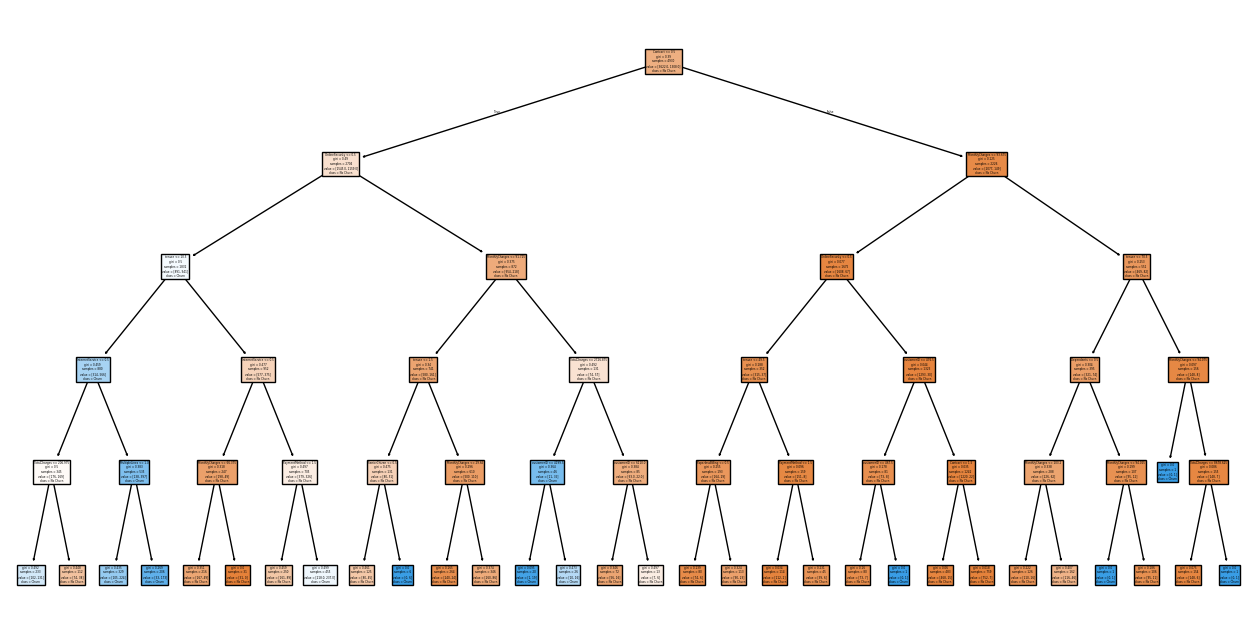

In [11]:
plt.figure(figsize=(16,8))
plot_tree(model, feature_names=X.columns, class_names=["No Churn", "Churn"], filled=True)
plt.show()


# Conclusion
The Decision Tree Classifier successfully predicts customer churn with good accuracy.

Business insights:

Customers with month-to-month contracts, electronic check payments, and high monthly charges are at greater risk of churn.

Telecom companies can target these customers with discounts, long-term plans, and better service packages to reduce churn.

#Assumptions

**Data Quality**

   1.The dataset provided is accurate and representative of the company’s customers.

   2.Missing values in TotalCharges are due to new customers and can be imputed with the median.

**Feature Encoding**

1.All categorical variables (e.g., gender, contract type, payment method) can be effectively converted to numerical values without losing important information.

2.Label Encoding or One-Hot Encoding is sufficient for capturing categorical differences.

**Customer Behavior**

Customer churn is primarily influenced by contract type, tenure, and billing information (as observed in telecom industry trends).

Demographic features (like gender) may have little impact, but are still included.

**Model Choice**

A Decision Tree Classifier is appropriate because it is interpretable and can capture nonlinear relationships between customer features and churn.

Maximum tree depth and splitting criteria (Gini index) are assumed to provide a balance between accuracy and interpretability.

**Evaluation**

The dataset is assumed to be large enough and balanced enough for train-test splitting to provide reliable performance estimates.

Accuracy, Precision, Recall, and F1-score are sufficient to evaluate the model’s performance.

**Business Context**

Customers labeled as “Churn = 1” have left the service within the observed period.

Reducing churn by even a small percentage can significantly increase the company’s revenue, hence the predictive model is valuable.